In [14]:
import binascii

def str_to_hex(string):
    hex_string = binascii.hexlify(bytearray(string, 'utf-8')).decode("utf-8") 
    return hex_string

def hex_to_str(hex_string):
    result = binascii.unhexlify(hex_string.encode("utf-8")).decode("utf-8")
    return result

def str_to_array(string):
    hex_string = str_to_hex(string)
    array = [int(symbol, 16) for symbol in hex_string]
    return array
    

In [15]:
from math import sin, pi

def window(index, length):
    return sin((pi * index) / (length))

def get_segment(freq, length = 44100 // 10, ampl = 1, samplerate = 44100) :
    segment = []
    for index in range(length):
        sample = ampl 
        sample *= sin(2 * pi * freq * index / samplerate)
        sample *= window(index, length)
        segment.append(sample)
    return segment

In [16]:
def get_symbol_freq(symbol):
    tones = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88]
    octave = symbol // len(tones)
    tone = symbol % len(tones)
    freq = (2 ** octave) * tones[tone]
    return freq

In [17]:
def modulate(array):
    signal = []
    for symbol in array:
        freq = get_symbol_freq(symbol)
        segment = get_segment(freq)
        signal += segment
    return signal

In [18]:
import sounddevice 
import numpy as np
import wavio

import matplotlib.pyplot as plt

def transmit(data, save = False):
    if isinstance(data, str):
        array = str_to_array(data)
        signal = modulate(array)
        signal += [0] * 3000
    else:
        array = data
        signal = modulate(array)
    
    plt.figure(figsize=(20,10))
    plt.plot(signal)
    sound = np.float32(signal)
    sounddevice.play(sound, 44100)
    sounddevice.wait()
    if save:
        wavio.write(f"sounds/{data}.wav", sound, 44100, sampwidth=2)
    return sound

array([0.0000000e+00, 3.5431120e-05, 1.4154904e-04, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

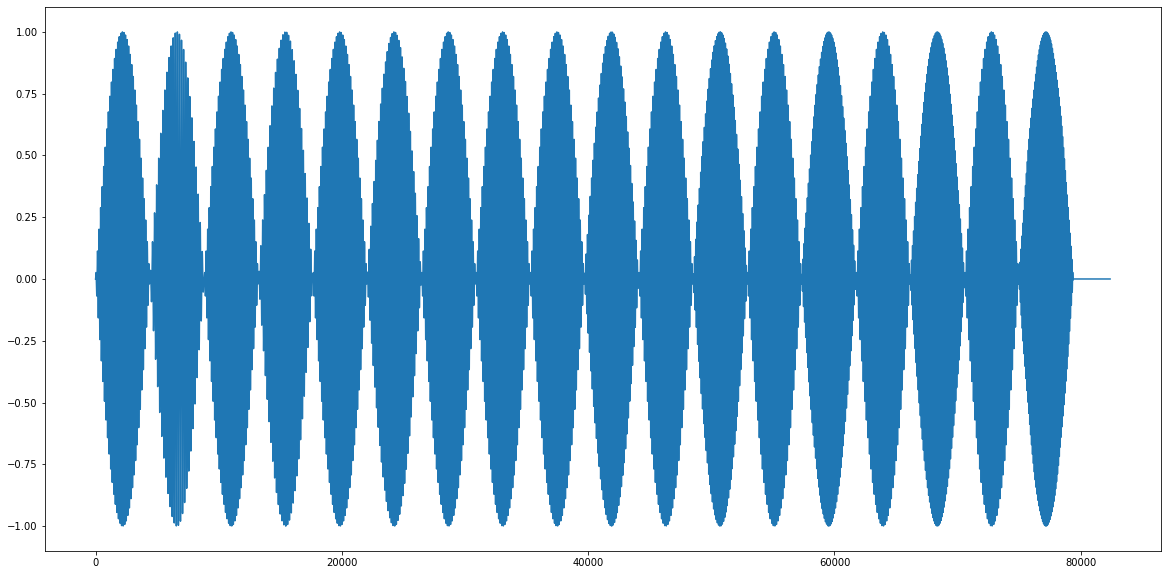

In [19]:
transmit("012345678")

array([0.0000000e+00, 3.9766081e-05, 1.5881626e-04, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

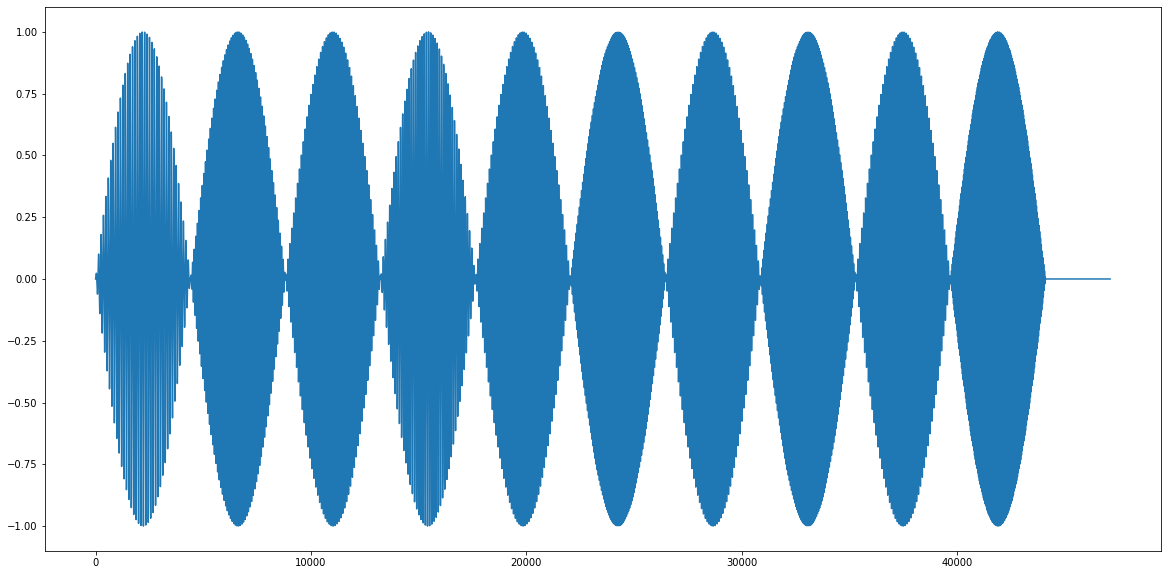

In [20]:
transmit("Hello")